In [1]:
import artist
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# recognizes all grid cells with tracer conc above thresh as plume pixel, returns 3d field
def sel_plume(tr, thresh):    
    tr_plume = tr.where(tr > thresh)
    tr_plume = tr_plume.fillna(0)    
    return tr_plume

# determines mass loading; returns 2d field
def tracer_load(tr, rho, dz):
    m_tr = tr * rho * dz
    m_tr = m_tr.sum('height')
    return m_tr

In [3]:
map_ext = (-61.5, -58, 11.5, 15.0)    
lon_vec = np.arange(map_ext[0], map_ext[1], 0.001)
lat_vec = np.arange(map_ext[2], map_ext[3], 0.001)

In [4]:
filename = '/work/bb1093/b380891/Soufriere_aerodyn_fplume_neu/Soufriere-April-2021-fplume-aerodyn-forecast_mode_DOM03_ML_0160.nc'
gridfile = '/work/bb1093/b380891/INPUT/Soufriere_remap/R3B09_DOM02.nc'  

In [5]:
ds = xr.open_dataset(filename)
g, vlon, vlat, clon, clat = ds.icon.add_grid(gridfile, ltranslon=True)
modes = ds.icon.get_modes(mode_type='_sol')
dz = ds.icon.dz

In [6]:
varM = tracer_load(sel_plume(ds.ash_mixed_acc, 0.01), ds.rho, dz) + tracer_load(sel_plume(ds.ash_mixed_coa, 1), ds.rho, dz) 
varM = varM*10**(-6)

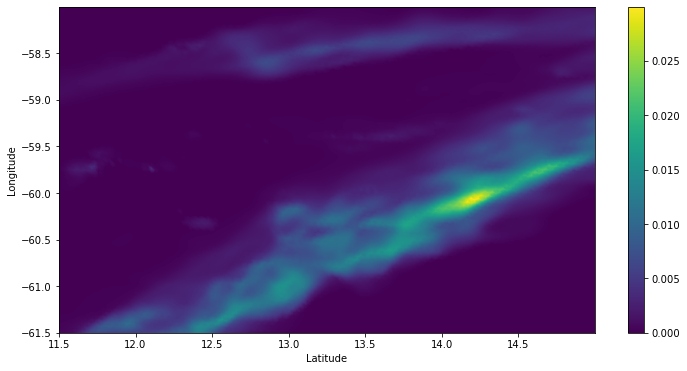

In [7]:
varM.geo.regrid(g, lon_vec, lat_vec, method='linear').plot(figsize=(12, 6))
plt.show()

In [8]:
varM.viz.plot()

Wait: Figures are on the way.
